In [184]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [185]:
def display(img,cmap='gray'):
    fig=plt.figure(figsize=(10,8))
    ax=fig.add_subplot(111)
    ax.imshow(img,cmap)

In [186]:
reeses =cv2.imread('DATA/reeses_puffs.png',0)

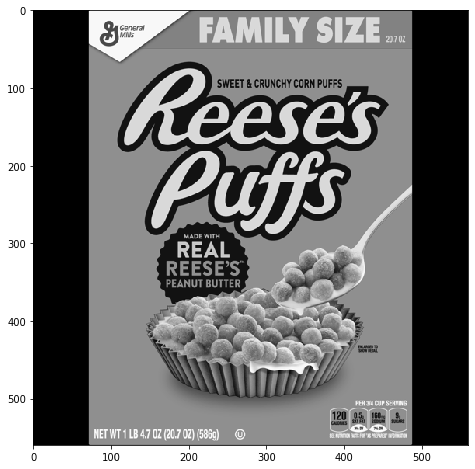

In [187]:
display(reeses)

In [188]:
cereals=cv2.imread('DATA/many_cereals.jpg',0)

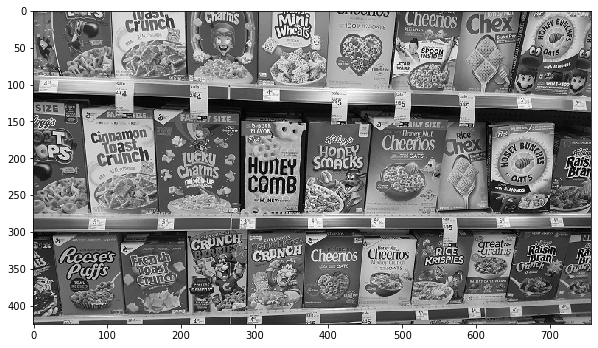

In [189]:
display(cereals)

## BRUTE FORCE DETECTION ORB

In [190]:
orb= cv2.ORB_create()#orb object

In [197]:
kp1,des1=orb.detectAndCompute(image=reeses,mask=None) # detect key points and descriptors
kp2,des2=orb.detectAndCompute(image=cereals,mask=None)

In [198]:
bf=cv2.BFMatcher(normType=cv2.NORM_HAMMING,crossCheck=True) #create brute force object

In [199]:
matches=bf.match(queryDescriptors=des2,trainDescriptors=des1) # find the matches between img1 and img2

In [200]:
#Sort the matches to list them in order
matches=sorted(matches, key=lambda x:x.distance) #less the distance good the match (ascending order)

In [201]:
outputImg=cv2.drawMatches(img1=reeses,keypoints1=kp1,img2=cereals,keypoints2=kp2,matches1to2=matches,outImg=None,flags=2)#draw the matches

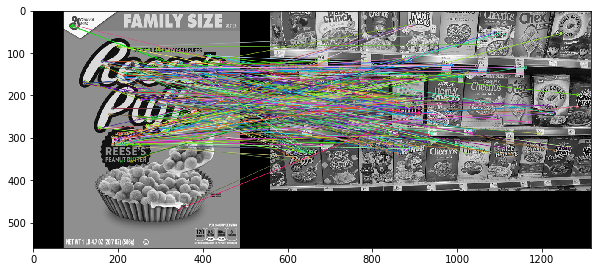

In [202]:
display(outputImg)

In [203]:
outputImgTop25=cv2.drawMatches(img1=reeses,keypoints1=kp1,img2=cereals,keypoints2=kp2,matches1to2=matches[:25],outImg=None,flags=2)#draw the matches

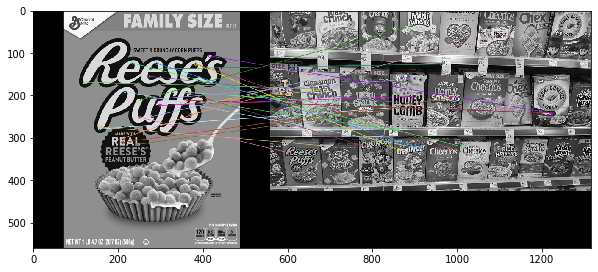

In [204]:
display(outputImgTop25)

## Brute force using SIFT (Scale Invariant Feature Transform)

In [205]:
sft=cv2.xfeatures2d.SIFT_create()

In [206]:
kp1,des1=sft.detectAndCompute(image=reeses,mask=None)
kp2,des2=sft.detectAndCompute(image=cereals,mask=None)

In [207]:
bf=cv2.BFMatcher()

In [208]:
matches=bf.knnMatch(queryDescriptors=des1,trainDescriptors=des2,k=2)#k -> number of best matches first will be best than second

In [209]:
good_matches=[]

In [210]:
#Ratio test to find best matches
#Ratio of match1 < 75% of ratio 2
for match1,match2 in matches:
    if match1.distance < 0.75*match2.distance:
        good_matches.append([match1])#should be in array

In [211]:
len(good_matches)

78

In [212]:
len(matches)

1500

In [213]:
sift_matches=cv2.drawMatchesKnn(img1=reeses,keypoints1=kp1,img2=cereals,keypoints2=kp2,matches1to2=good_matches,outImg=None,flags=2)

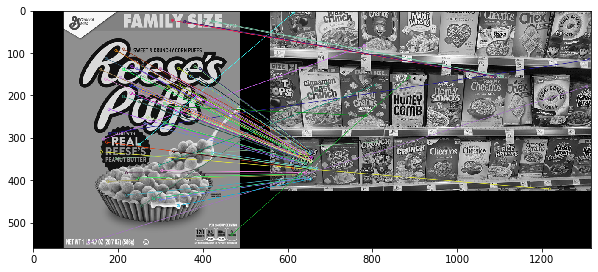

In [214]:
display(sift_matches)

## FLANN BASE DETECTION

In [215]:
#FLANN FastLibrary for Approximate Nearest neighbour

In [217]:
len(matches)

1500

In [222]:
sift=cv2.xfeatures2d.SIFT_create()
kp1,des1=sift.detectAndCompute(reeses,None)
kp2,des2=sift.detectAndCompute(cereals,None)
FLANN_INDEX_KDTREE=0
index_params=dict(algorithm=FLANN_INDEX_KDTREE,trees=5)
search_params=dict(checks=50)
flann=cv2.FlannBasedMatcher(index_params,search_params)
matches_flann=flann.knnMatch(des1,des2,k=2)

In [224]:
good_flann_matches=[]
for match1,match2 in matches:
    if match1.distance < 0.7*match2.distance:
        good_flann_matches.append([match1])

In [225]:
len(good_flann_matches)

67

In [227]:
flann_matches=cv2.drawMatchesKnn(img1=reeses,keypoints1=kp1,img2=cereals,keypoints2=kp2,matches1to2=good_flann_matches,outImg=None,flags=2)

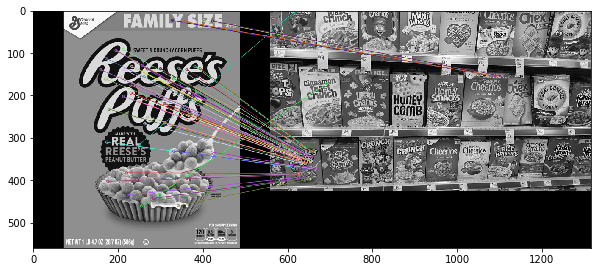

In [228]:
display(flann_matches)

In [232]:
# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test
for i,(match1,match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)# 0 gives all points and top points in green lines 2 gives only top points as lines

In [235]:
flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,matches,None,**draw_params)

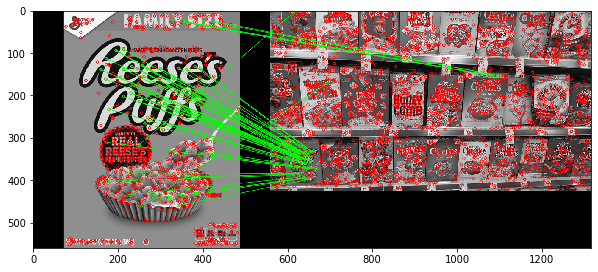

In [236]:
display(flann_matches)